# Machine Team 4 (Michael DiSanto, Dawn Massey & Brian Nicholls)
### BA545: Data Mining - Competition #2 (Online Shoppers' Purchasing Intentions)
#### Data Audit Report - Spring 2020


<img src="https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg" width=60%/>

Note: This work was completed using the CRISP-DM Framework shown above; accordingly, it will serve as an organizing framework for this report.

#### **Table of Contents:**

0. [Part 0: Preparing for Analysis](#part0)
1. [Part I: Business Issue Understanding](#part1)
2. [Part II: Data Understanding & Exploratory Data Analysis (EDA)](#part2)
3. [Part III: Data Preparation](#part3)

#### **Note: Parts IV onward are for future work**
4. [Part IV: Data Analysis/Modeling](#part4)
5. [Part V: Validation](#part5)
6. [Part VI: Presentation/Visualization](#part6)
7. [Part VII: Sources](#part7)



# Part 0: Preparing for Analysis  <a name="part0"></a>
#### Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

In [3]:
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')

# Part I: Business Issue Understanding  <a name="part1"></a>

## A. Research Question:
Overall, this project's research question is: *What drives potential customers to make purchases?*

## B. Scope of Work:
This project is a classification project in which the members of Machine Team 4 (Michael DiSanto, Dawn Massey and Brian Nicholls) will use the data feature, Revenue, as the target feature when predicing whether a consumer made a purchase and, thus, is part of Class 1 (i.e., if Revenue > 0) or, instead, whether the consumer did not make a purchase and, thus, is part of Class 0 (i.e., if Revenue <= 0). 

Using the 10 numerical (continous) and 8 categorical features in the given dataset, members of the team we will utilize advanced and novel methods in preparing the data to design and implement a model for the client that will predict whether a site visitors will make a purchase. The model will be evaluated on the basis of its prediction accuracy and its predictive power. 

Deliverable due dates are as follows:
*     Data Audit Report due Tuesday, March 31, 2020
*     Initial Data Model due Tuesday, April 14, 2020
*     Final Presentation and Report due Tuesday, April 28, 2020

## C. Business Understanding:
Online shopping is an important revenue source for many retail businesses, such as our client. According to Sakar et al. (2019), desipte increases in e-commerce traffic in the recent past, "conversion" (of browsers to purchasers) has not increased proportionately. Indeed, the dataset includes 12,330 "sessions," of which only 1908 (15.5%) resulted in conversion (Sakar et al. 2019, 6895). Thus, it is very important for retail companies, such as our client, to better understand - in real time - the cues that drive conversion. Complicating the process is that unlike "brick and mortar" stores where shoppers can interact with salespeople who, in turn, can help to facilitate (or at least understand) customer conversion on the basis of their interaction, online retail businesses must *infer* customer behavior from other cues. But, what are those cues for our client? As part of determining whether a "browser" will become a "purchaser," our client also might like to know about the cues suggesting the opposite behavior - i.e., abandoning the site or the shopping cart. Additionally, the client might like to know why customers purchasing competitors' products fail to visit their website. On the basis of our models, our client is interested in knowing what we might suggest doing (in real time) to increase conversion/reduce abandonment. Further our client might also like to know if we believe there are other factors that have not been captured in the dataset that might be helpful in better predicting conversion/abandonment in the future as well as figuring out how to attract to the client's websitem consumers who make purchases on competitors' websites.

Past research has focused on: 
clickstream data
session information
session length in terms of the number of Web pages visited in a session
session duration in seconds
average time per page in seconds
traffic type (representing the page that referred the user to a particular (bookstore) site
three binary variables representing a set of key perations related to the commercial intent
a set of product categories viewed during the session 
sequential data/most frequently followed navigation paths
(see Sakar et al. 2019, p. 6894, ff.)


### _Reference:_
Sakar, C., S. Polat, M. Katircioglu and Y. Kastro. 2019. Real-time predicgion of online shoppers' purchasing intention using multilayer perceptron and LSTM recurrent neural networks. *Neural Computing and Applications 31:* 6893-6908.


# Part II: Data Understanding & Exploratory Data Analysis  <a name="part2"></a>

## A. Data Understanding
Data Understanding includes providing an overview of the dataset, conducting exploratory data analysis, verifying data quality, and deciding how to address data quality issues.

#### _1. Overview of Dataset_
The dataset that has been gathered for purposes of this analysis contains 18 variables: Revenue, which is the Target Variable (where Revenue = TRUE if the customer visiting the website made a purchase - i.e., Class 1; and Revenue = FALSE if the customer visiting the website did not make a purchase - i.e., Class 0); and 17 predictor variables, including 10 continuous features and 7 categorical features, each of which are listed below and then delineated within our Data Dictionary.


##### a. Continuous Features:
*     Administrative: Number of pages visited by the visitor about account management  
*     Administrative Duration: The total amount of time (in seconds) the visitor spent on account management-related pages
*     Informational: Number of pages visited by the visitor about Web site and its communciation and address information 
*     Informational Duration: The total amount of time (in seconds) the visitor spent on informational pages
*     Product Related: Number of pages visited by the visitor about product-related pages  
*     Product Related Duration: The total amount of time (in seconds) the visitor spent on product-related pages  
*     Bounce Rate: Average bounce rate value of the pages visited by the visitor
*          (Note: a "bounce" occurs when a visitor enters the site from a particular page and then leaves the site (bounces) 
*          without any further activity.)
*     Exit Rate: Average exit rate value of the pages visited by the visitor
*     Page Value: Average page value of the pages visited by the visitor
*     Special Day: Closeness of the visitor's visit to the site to a special day (e.g., Mother's Day, Valentine's Day)


##### b. Categorical Features:
*     OperatingSystems: Operating system of the visitor (8 possible operating systems)
*     Browser: Browser of the visitor (13 possible browsers)
*     Region: Geographic region from which the sesion has been started by the visitor (9 possible regions)
*     TrafficType: Traffic source by which the visitor has arrived at the Web site - e.g., banner, SMS, direct (20 possible types)
*     VisitorType: Visitor type as "New Visitor," "Returning Visitor," and "Other" (3 possible types)
*     Weekend: Boolean value indicating whether the date of the visit is a weekend (2 possible values)
*     Month: Month value for visit date (12 possible months)


##### c. Data Dictionary:

<table class="tg">
<tbody>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Data Dictionary</strong></td>
</tr>
<tr>
<tr>
<th class="tg-0pky">Variable</th>
<th class="tg-0pky">Variable Name</th>
<th class="tg-0pky">Variable Definition</th>
<th class="tg-fymr">Data Type</th>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash; Numerical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page</strong></td>
<td class="tg-fymr">Administrative</td>
<td class="tg-fymr">Number of pages visited by the visitor about account management.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page Duration</strong></td>
<td class="tg-fymr">Administrative_Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on account management-related pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>About Us page</strong></td>
<td class="tg-fymr">Informational</td>
<td class="tg-fymr">Number of pages visited by the visitor about Web site and its communciation and address information.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Informational Duration</strong></td>
<td class="tg-fymr">Informational Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on informational pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product page</strong></td>
<td class="tg-fymr">ProductRelated</td>
<td class="tg-fymr">Number of pages visited by the visitor about product-related pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Related Duration</strong></td>
<td class="tg-fymr">ProductRelated_Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on product-related pages</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Bounce Rate</strong></td>
<td class="tg-fymr">BounceRates</td>
<td class="tg-fymr">The percentage of single page visits (or web sessions). It is the percentage of visits in which a person leaves your website from the landing page without browsing any further.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Exit Rate</strong></td>
<td class="tg-fymr">ExitRates</td>
<td class="tg-fymr">For all pageviews to the page, Exit Rate is the percentage that were the last in the session</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Page Value</strong></td>
<td class="tg-fymr">PageValues</td>
<td class="tg-fymr">the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Special Day</strong></td>
<td class="tg-fymr">SpecialDay</td>
<td class="tg-fymr">the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash;Categorical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Month</strong></td>
<td class="tg-fymr">Month</td>
<td class="tg-fymr">Month in which the visit took place</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>OperatingSystems</strong></td>
<td class="tg-fymr">OperatingSystems</td>
<td class="tg-fymr">Operating system of the computer in which the user used while viewing the site</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Browser</strong></td>
<td class="tg-fymr">Browser</td>
<td class="tg-fymr">Browser in which the user used to view the site</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Region</strong></td>
<td class="tg-fymr">Region</td>
<td class="tg-fymr">Region wher ethe user is located</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>TrafficType</strong></td>
<td class="tg-fymr">TrafficType</td>
<td class="tg-fymr">Traffic source by which the visitor has arrived at the Web site - e.g., banner, SMS, direct (20 possible types)</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Visitor Type</strong></td>
<td class="tg-fymr">VisitorType</td>
<td class="tg-fymr">Is this a returing visitor or a new visitor</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Weekend</strong></td>
<td class="tg-fymr">Weekend</td>
<td class="tg-fymr">Did the visit happen on the weekend?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Revenue</strong></td>
<td class="tg-fymr">Revenue</td>
<td class="tg-fymr">Did the visit result in Revenue?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>



### B. Exploratory Data Analysis (EDA) &  Data Quality Verification (DQV)


#### _1. Overview of Findings from EDA & DQV (per the below):_
*     There are 12,330 observations with one target value and 17 features.
*     There are no missing values; however, we did note the following:
    ** There are no observations for January and April - which suggests the dataset does not include a full year's-worth of information, which may limit our ability to assess monthly trends/differences.
    ** A few (85) observations were coded as "other" - meaning they were neither new nor returning customers; since "new" and "returning" customers are mutually exclusive, the observations coded as "other" appear to be erroneous.
    ** 85% of the data come from Browser 1 (20%) or 2 (65%); hence, the data are not balanced with regard to browser
    ** Approximately 90% of the data comes from days other than "Special" days
    ** 
*     Bounce Rate and Exit Rate are highly correlated at 0.91; however, they also are highly correlated with the target variable (at -0.15 for Bounce Rate and at -0.25 for Exit Rate); hence, we are reluctant to remove either from our analysis. Rather, we will consider engineering a new feature that combines Bounce Rate with Exit Rate (e.g., via a linear combination of an average or weighted average of the features).
*     Administrative Page and Exit Rates are also highly correlated at -0.43; however, they, too, are highly correlated with the target variable (at 0.62 for Adminstative Page and at -0.25 for Exit Rate); hence, we are reluctant to remove either from our analysis. Rather, we will consider engineering a new feature that combines Administative Page with Exit Rate (e.g., via a division of one feature by the other).
*     Our data is imbalanced toward Revenue = False (i.e, Class 0, no purchases).



#### _2. Descriptive Statistics:_

In [4]:
sample =df.sample(30)
sample

Administrative  Administrative_Duration  Informational  \
6259                1                 3.000000              0   
2272                0                 0.000000              0   
5023                0                 0.000000              0   
8800                1                34.500000              0   
4420                0                 0.000000              0   
9612                0                 0.000000              0   
6321                0                 0.000000              0   
6230                2                 7.000000              0   
11938               0                 0.000000              0   
4771                0                 0.000000              0   
7957                3               180.133333              1   
1160                1                 0.000000              0   
6691               18               167.000000              0   
1679                0                 0.000000              0   
3796                1                49.000000              0   
7377               16               825.940018              1   
1340                1                 0.000000              0   
7374                2                79.600000              0   
5334                1                32.750000              1   
2528                0                 0.000000              0   
1709                5               120.000000              1   
6419                3                38.300000              0   
4018                2                73.000000              0   
3031                5                65.000000              0   
387                 0                 0.000000              0   
2994                1                42.000000              0   
9297                5                85.500000              0   
10879               0                 0.000000              0   
854                 7               146.250000              0   
142                 3                19.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
6259                      0.0              24               342.000000   
2272                      0.0               2                 0.000000   
5023                      0.0               8               856.416667   
8800                      0.0              18              3026.374242   
4420                      0.0              10                99.000000   
9612                      0.0               5               178.833333   
6321                      0.0              11               199.500000   
6230                      0.0              15               533.110000   
11938                     0.0               1                 0.000000   
4771                      0.0               5               161.500000   
7957                     34.2              27               242.450000   
1160                      0.0               8               192.166667   
6691                      0.0              37              1113.898538   
1679                      0.0              27               807.833333   
3796                      0.0               4              2210.500000   
7377                    120.8             109              2110.422354   
1340                      0.0               4                31.000000   
7374                      0.0              24               433.360000   
5334                     11.0              43              2949.550000   
2528                      0.0               1                 0.000000   
1709                      0.0              27              1583.596154   
6419                      0.0              18               929.200000   
4018                      0.0              11               327.666667   
3031                      0.0              48              1142.666667   
387                       0.0               4                57.000000   
2994                      0.0              10              1057.000

### Observations
----------------------------------------------------------------------
##### Initial import seems to accurate and complete in comparison to the data dictionary

In [5]:
# More info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### Observations
----------------------------------------------------------------------
##### There are no null columns on import and 12330 rows and 18 columns
##### Month, VisitorType, Weekend, and Revenue are non-numberic attributes that may need adjustment later in the analysis.

In [6]:
# Inital description of the data
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

### Observations
----------------------------------------------------------------------

##### BounceRate, ExitRate, & SpecialDay are on a 0-1 scale, while the others nummerical attributies are on a differnt scale.
##### SpecialDay, OperatingSystem, Browser, Region, TrafficType are all categorical attributes which could be futher analyzed using encoding.

#### _3. Correlation Analysis:_

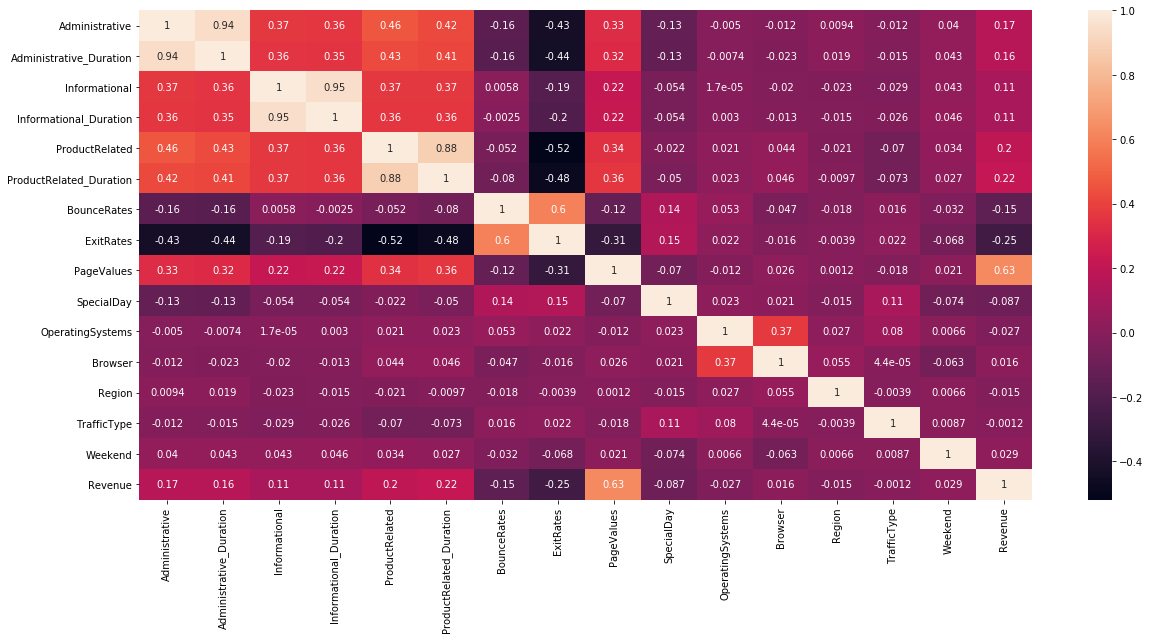

In [7]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)

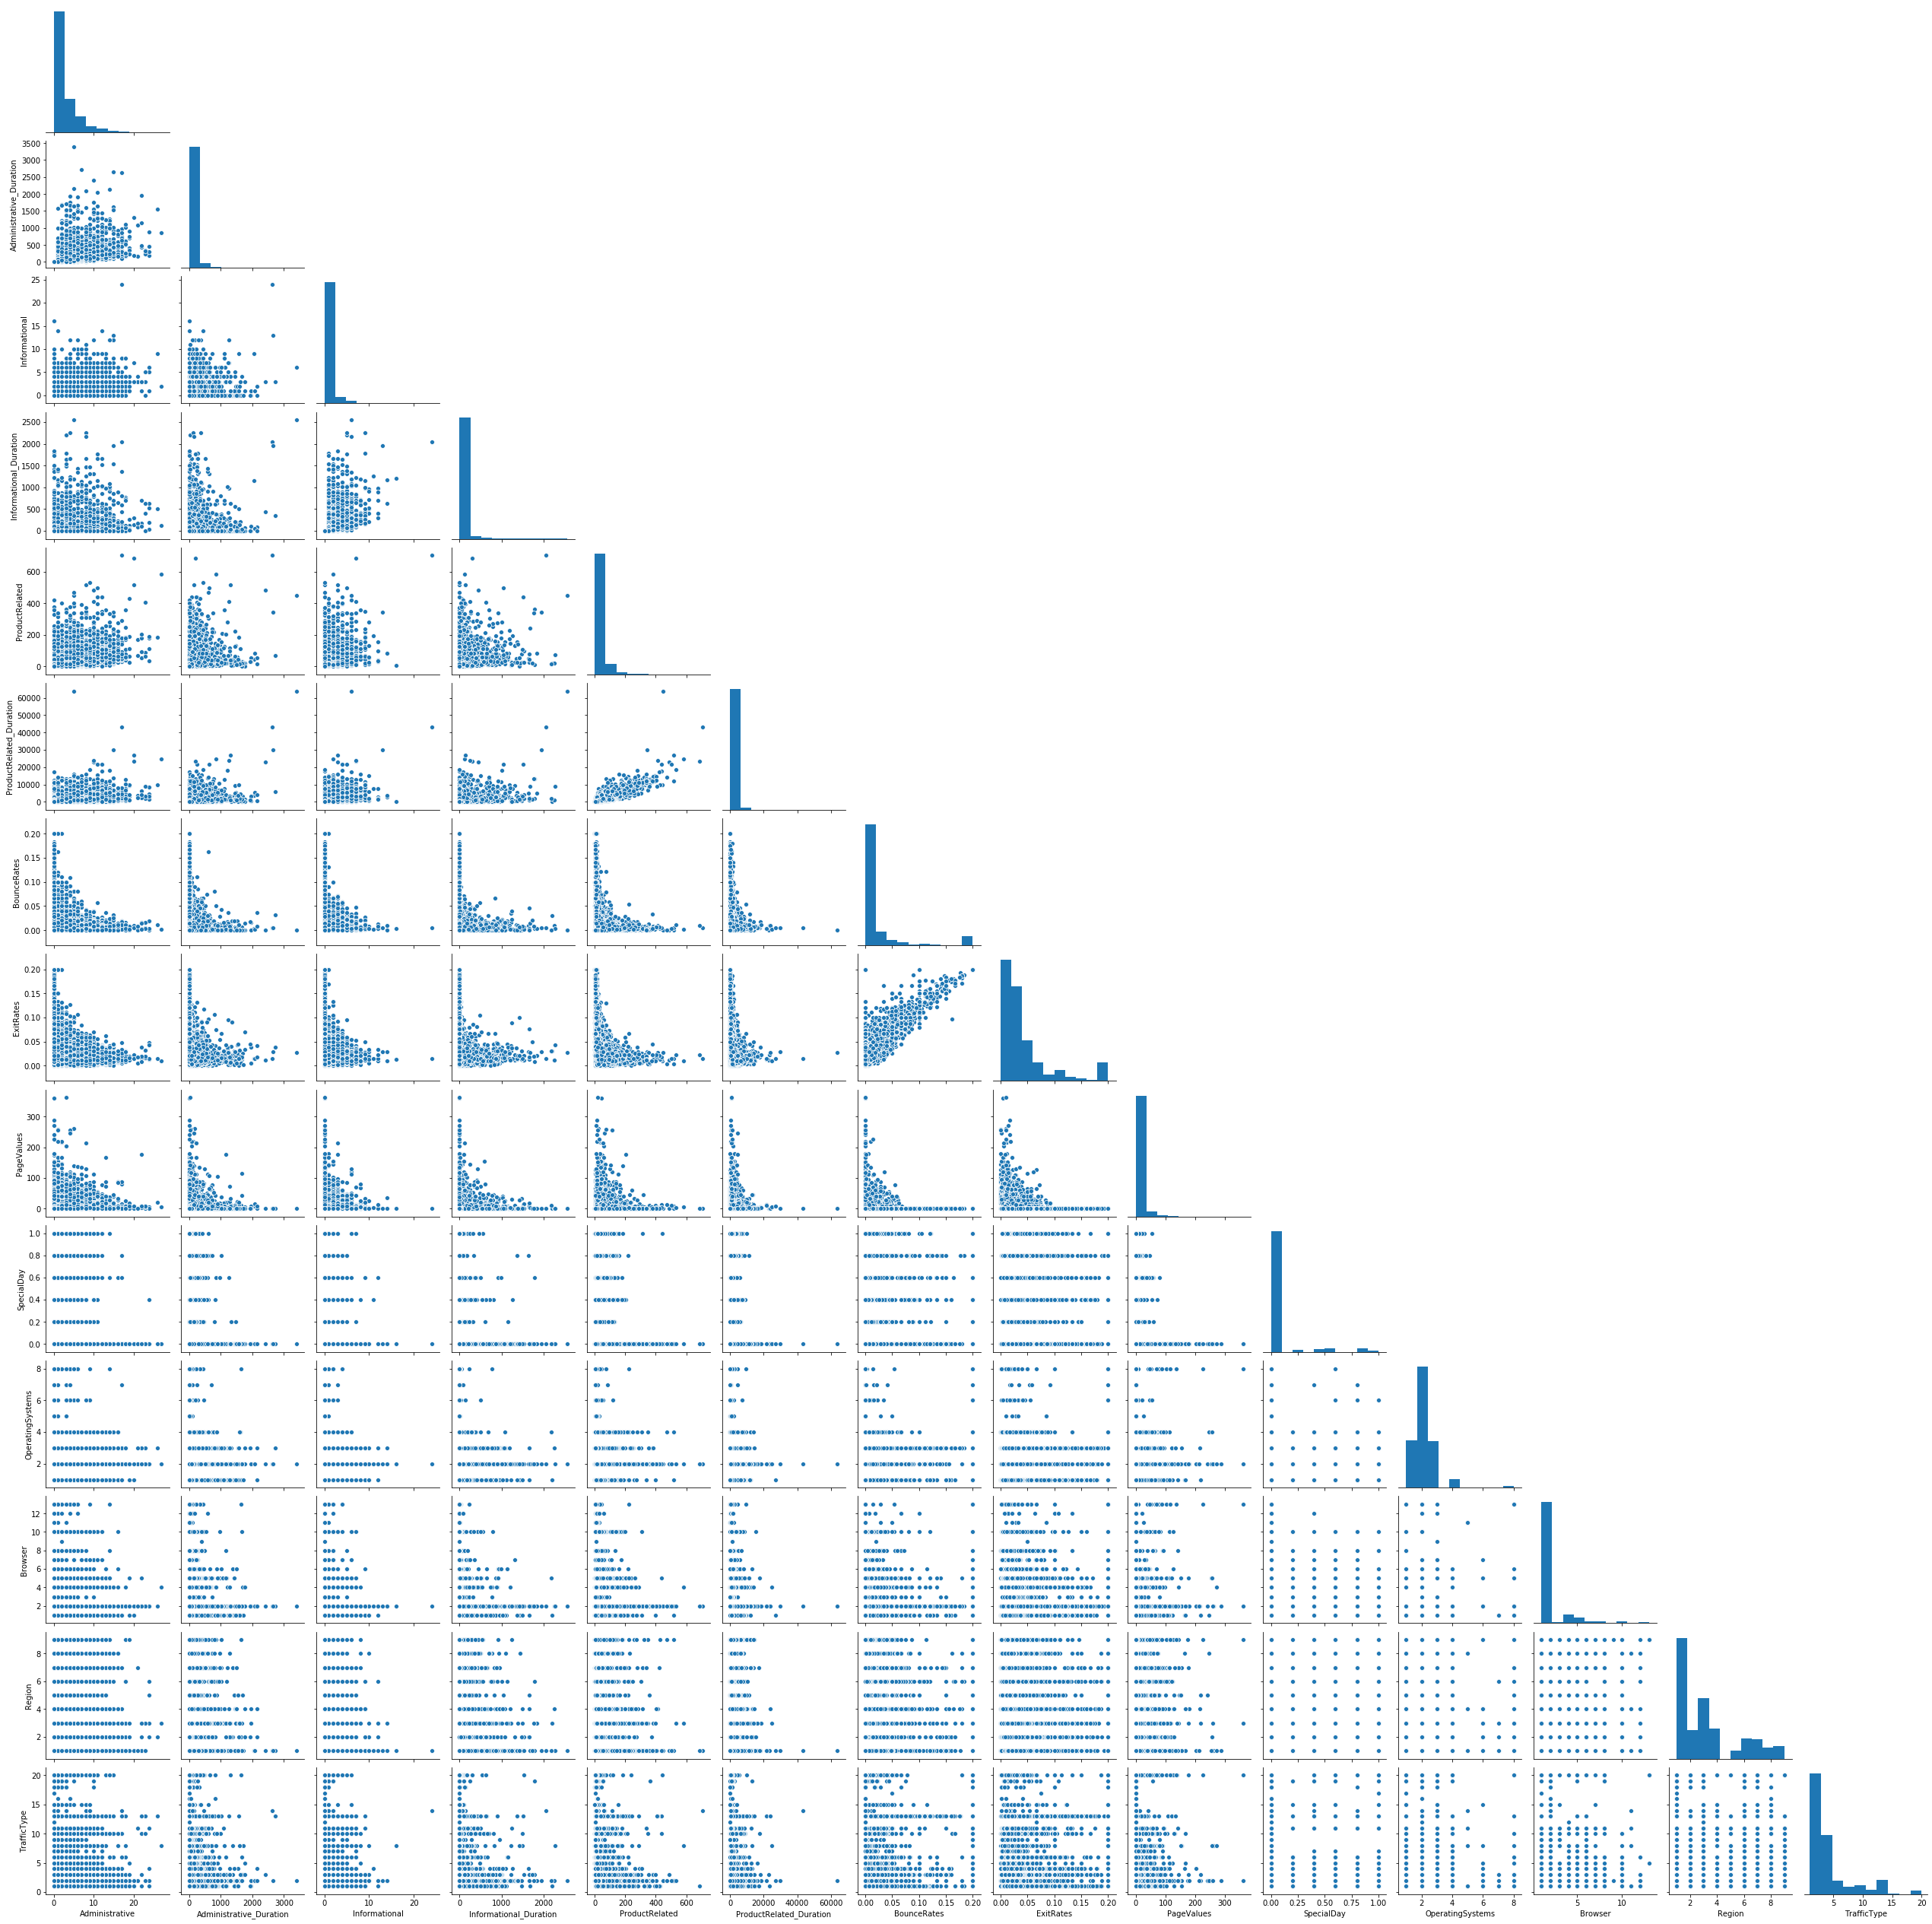

In [8]:
numerical_list=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
sns.pairplot(df[numerical_list],corner=True)

### Observations
----------------------------------------------------------------------

##### We observed the following high correlations:
    - The duration attributes may need to be assesed for elimination in the final model as each is very highly correlated with its corresponding non-duration attribute.
    
    - Administrative & ProductRelated have a correlation of 0.46; this merits further investigation and possible feature engineering.
    - Administrative & ProductRelated_Duration have a correlation of 0.42; this merits further investigation and possible feature engineering.
    - Administrative & ExitRates have a correlation of -0.43; this merits further investigation and possible feature engineering.
 
    - Administrative_Duration & ExitRates have a correlation of -0.44; this merits further investigation and possible feature engineering.
    - Administrative_Duration & ProductRelated have a correlation of 0.43; this merits further investigation and possible feature engineering.
    - Administrative_Duration & ProductRelated_Duration have a correlation of 0.41; this merits further investigation and possible feature engineering. 

    - ProductRelated & ExitRates have a correlation of -0.52; this merits further investigation and possible feature engineering.
 
    - ProductRelated_Duration & ExitRates have a correlation of -0.48; this merits further investigation and possible feature engineering.
    
    - BounceRate & ExitRates have a correlation of 0.6; this merits further investigation and possible feature engineering.

    - ProductRelated & ExitRates have a correlation of -0.52; this merits further investigation and possible feature engineering.
    
    - PageValues & Revenue have a correlation of 0.63; As Revenue is the target we would expect PageValues to be a useful attribute in our model.

#### _4. Prelimiary EDA Visualizations:_

In [9]:
profile = ProfileReport(df)
profile

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



### Observations for Preliminary EDA/Visualizations:
----------------------------------------------------------------------

##### **Warnings – highlights:**
    -High correlation between Exit Rates and BounceRates, which we noted in the correlation map.
    -Dataset has 125 duplicate rows, which we decided to allow given that there are no unique identifiers that we could use to verify whether the apparently duplicate entries (~1% of the data) were bogus or legitimate.

##### **Variables – highlights:**

    - Administrative is a count between 0 and 27; it is right skewed (with ~66% of the dataset in 0, 1, 2)
    - Administrative_duration captures time spent; it also is right skewed with almost 50% of the data being zero (which makes sense because almost 50% of the data in Administrative is zero)

    - Informational is a count between 0 and 24; it is right skewed (with ~90% of the dataset in 0, 1, 2)
    - Informational_duration captures time spent; it also is right skewed with over 80% of the data being zero (which makes sense because over 78% of the data in Informational is zero)

    - ProductRelated is a count between 0 and 705; it is right skewed (however; only ~12% of the dataset in 0, 1, 2)
    - ProductRelated_duration captures time spent; it also is right skewed with almost 6% of the data being zero (which makes sense because only 12% of the data in ProductRelated is zero)

    - BounceRate captures the percentage of visits in which a visitors exits the landing page without browsing any further. It is right skewed, with about 45% of the data being a value of 0. Given that those who “bounce” will certainly not buy, this         attribute may well be an important variable in our model. (Note: ExitRate, which is highly correlated with BounceRate, also is likely to have a similar skewness, distribution and importance in predicting online shoppers’ purchasing behavior.)

    - PageValues are dollar amounts – more or less – amounting to sales amounts, divided by page views. The variable is right skewed with approximately 78% of PageValues being zero; this makes sense because about 45% of customers “bounce” immediately,       buying nothing, leaving another ~30% to browse without completing a purchase.

    - SpecialDay is a binary variable with 0 for not near a holiday/special day and 1 for near a holiday/special day. The variable is right skewed with approximately 90% of the data being zero (i.e., transaction not occurring near a holiday/special           day). This information suggests to us that we are dealing with a unique retail environment (i.e., most retailers experience increased activity at/during holiday times).

    - Month – is the month of the year in which the transaction occurred. We first noted that the dataset is devoid of transactions in January and April. Thus, the dataset does not appear to contain a full year of information, which could impair our         ability to complete the analysis in light of potential seasonality. The most popular months for online browsing/shopping are: May (27.3%), November (24.3%), March (15.5%) and December 14.0%). Low months include: June-October, perhaps because           folks are not browsing/shopping online during the warmer months.

    - OperatingSystems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 

    - Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).

    - Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).

    - TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).

    - VisitorType – is a categorical variable. Most visitors (~86%) are return visitors. A few visitors have been classified as “Other”; however, they should not be so classified as the categories of “Returning_visitor” and “New_visitor” should capture       all visitors (i.e., a visitor is either one or the other).

    - Weekend – is a categorical variable to capture whether the visitor is visiting the site on a weekend. Approximately 77% of the visits took place during the week, which makes sense in light of the proportion of weekdays in a week (i.e., 5/7 =           71.4%).

    - Revenue – is the target variable. It is a categorical variable. It is imbalanced – as approximately 85% of the visits resulted in “no sale” (i.e., only ~15% of the visits resulted in sales). As such, we will need to balance the data later.


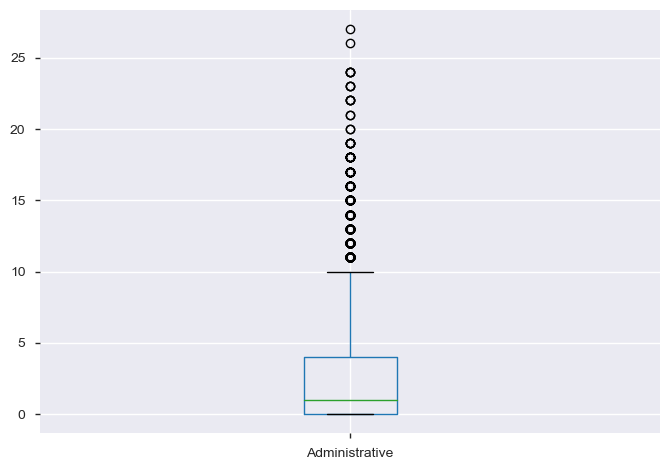

In [10]:
# Add Box Plots to further Describe the Data
# For Administrative
df_p=df.iloc[:,0]
df_p.plot.box()

In [11]:
# The group decided not to further consider the outliers because the values are not excessisvely extreme and are not outside a reasonable range.

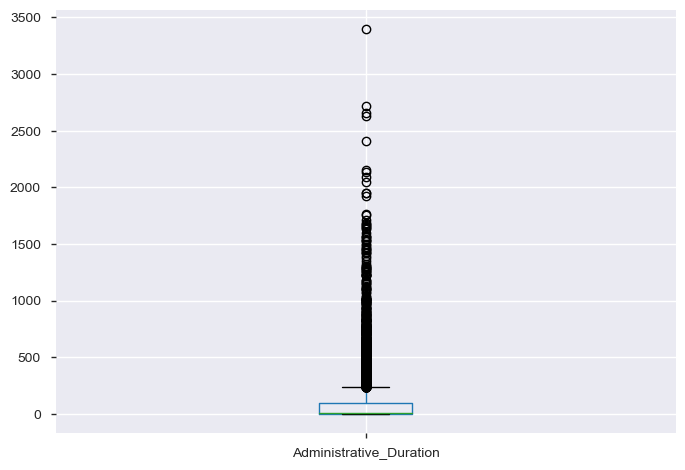

In [12]:
# For Administrative_Duration
df_p=df.iloc[:,1]
df_p.plot.box()

In [13]:
# The group decided not to further consider the outliers because there is an extrordinary amount

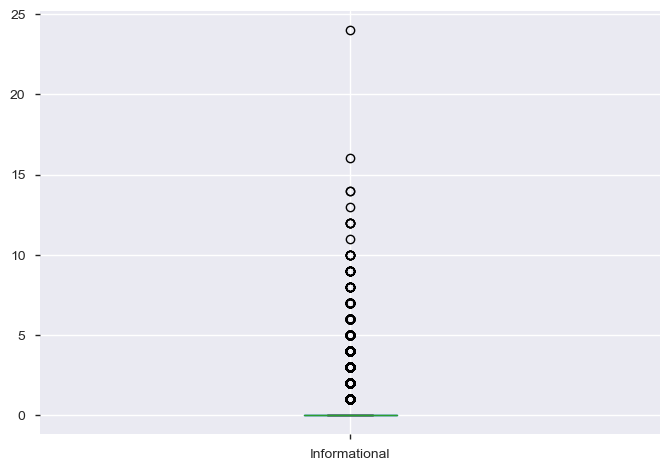

In [14]:
# For Informational
df_p=df.iloc[:,2]
df_p.plot.box()

In [15]:
# The group decided not to further consider the outliers because the values are not excessisvely extreme and are not outside a reasonable range.

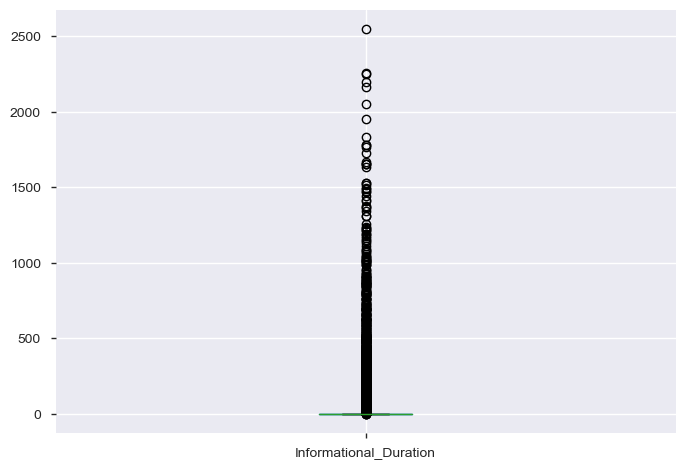

In [16]:
# For Informational_Duration
df_p=df.iloc[:,3]
df_p.plot.box()

In [17]:
# The group decided not to further consider the outliers because there is an extrordinary amount

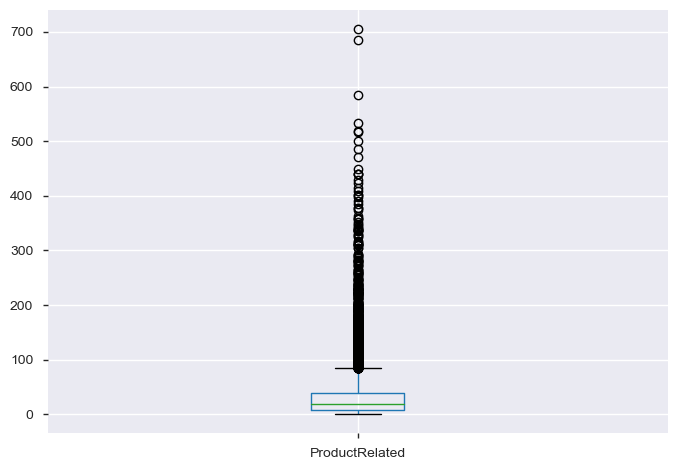

In [18]:
# For ProductRelated
df_p=df.iloc[:,4]
df_p.plot.box()

In [19]:
# The group decided not to further consider the outliers because there is an extrordinary amount

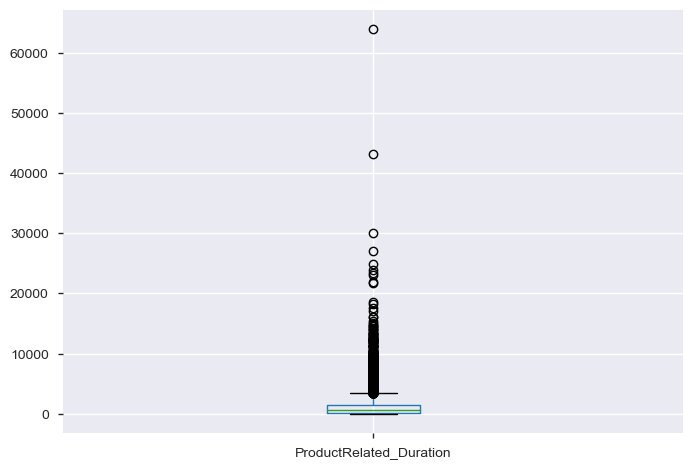

In [20]:
# For ProductRelated_Duration
df_p=df.iloc[:,5]
df_p.plot.box()

In [21]:
# The group decided not to further consider the outliers because there is an extrordinary amount

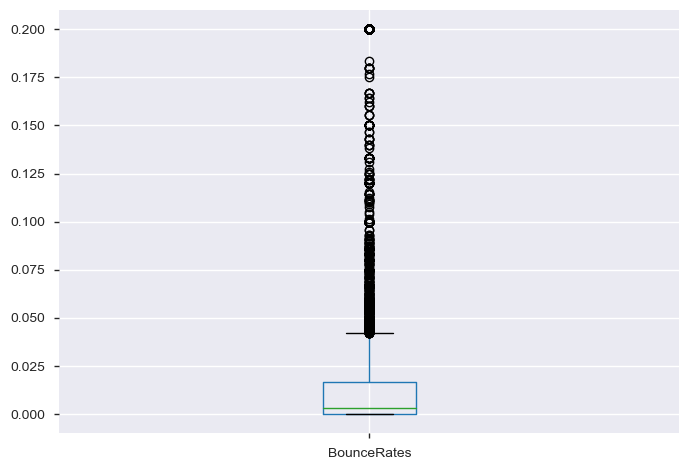

In [22]:
# For BounceRates
df_p=df.iloc[:,6]
df_p.plot.box()

In [23]:
# The group decided not to further consider the outliers because there is an extrordinary amount and the outlier values are not outside the range of 0-1

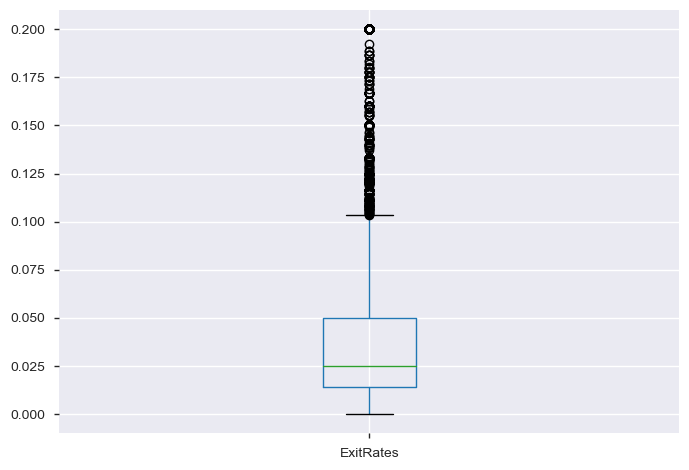

In [24]:
# For ExitRates
df_p=df.iloc[:,7]
df_p.plot.box()

In [25]:
# The group decided not to further consider the outliers because there is an extrordinary amount and the outlier values are not outside the range of 0-1

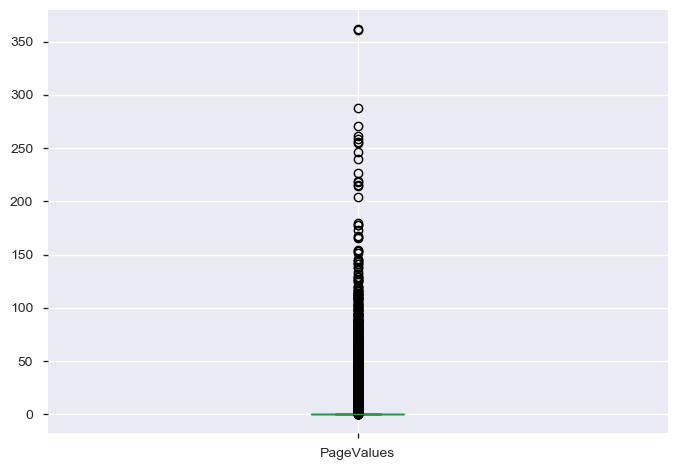

In [26]:
# For PageValues
df_p=df.iloc[:,8]
df_p.plot.box()

In [27]:
# The group decided not to further consider the outliers because there is an extrordinary amount and even the most extreme value of $350+ is reasonable considering the definition of the attribute.

### C. Data Quality Improvment Strategies
#### _1. Overview:_
Given the noted missing/erroneous values we have formulated the following pipeline for understanding and preparing our data.

We will complete the following pipeline step in the data understanding phase:

        1. Imputation 
           - We will replace VisitorType "Other" with the mode "Returning_Visitor"

We will complete the following pipeline steps in the data preparation phase:
       
       1. Feature Engineering
           - Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)
           - Binned 4 categorical variables to reduce the number of categories to five or fewer (Operating, Browser, Region and TrafficType) 
           - Encoded VisitorType, Month, Weekend, and Revenue using One Hot Encoding
       
       2. Outlier Detection
           - IQR Outlier Detection: We use the IQR to adjust issues with two of the created variables (Admin_per_Exit)
           
       3. Normalization
          - utilized quantile_transform method
          - utilized PowerTransformer as a secondary method
       
       4. Standardization
           a. Min-Max Scaler
           b. Z-Score Standardization
              - We initially omit this step due to using the Min-Max Scaler method
           c. Standard Deviation Outlier
              - We initially omit this step due to addressing outliers via IQR

In [28]:
# Pipeline - Imputation:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

Administrative  Administrative_Duration  Informational  \
VisitorType                                                                 
New_Visitor                  1694                     1694           1694   
Returning_Visitor           10636                    10636          10636   

                   Informational_Duration  ProductRelated  \
VisitorType                                                 
New_Visitor                          1694            1694   
Returning_Visitor                   10636           10636   

                   ProductRelated_Duration  BounceRates  ExitRates  \
VisitorType                                                          
New_Visitor                           1694         1694       1694   
Returning_Visitor                    10636        10636      10636   

                   PageValues  SpecialDay  Month  OperatingSystems  Browser  \
VisitorType                                                                   
New_Visitor              1694        1694   1694              1694     1694   
Returning_Visitor       10636       10636  10636             10636    10636   

                   Region  TrafficType  Weekend  Revenue  
VisitorType                                               
New_Visitor          1694         1694     1694     1694  
Returning_Visitor   10636        10636    10636    10636

# Part III: Data Preparation  <a name="part3"></a>

### A. Overview
Data Preparation includes preprocessing steps for selecting data (e.g., including feature engineering/binning) and cleaning data (e.g., recoding for any "new" features created; normalizing; handling outliers; dealing with skewness; standardizing; reviewing correlations to identify highly related/correlated features that s/b avoided in the analysis).

## 1. Selecting Data
    a. Feature Engineering

In [29]:
# Pipeline - Feature Engineering:
# Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates']

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2

#Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3

display(df[['Administrative', 'ExitRates', 'Admin_per_Exit', 'BounceRates', 'Bounce_Exit_Rate_Avg', 'Bounce_per_Exit_Rate',\
            'Administrative_Duration','Informational_Duration', 'ProductRelated_Duration', 'Total_Duration', 'Total_Duration_Avg']].sample(20))

Administrative  ExitRates  Admin_per_Exit  BounceRates  \
9389                0   0.018996        0.000000     0.005932   
2801                0   0.006667        0.000000     0.000000   
8726                0   0.011871        0.000000     0.003810   
3266                4   0.011871      336.960006     0.003419   
10277               2   0.042857       46.666667     0.009524   
4646                0   0.024603        0.000000     0.004762   
4282                3   0.018182      165.000002     0.000000   
11162               2   0.085714       23.333333     0.028571   
9978                6   0.011818      507.692300     0.001515   
4622                5   0.039825      125.550662     0.024561   
8828                0   0.200000        0.000000     0.200000   
9625                0   0.024226        0.000000     0.018750   
7363                9   0.028819      312.295165     0.005698   
6569                0   0.029630        0.000000     0.000000   
5608                9   0.044508      202.212765     0.021212   
4798                6   0.012500      480.000000     0.008333   
4933                8   0.029541      270.809630     0.012525   
24                  0   0.200000        0.000000     0.200000   
8290                1   0.003509      284.999994     0.000000   
4789                0   0.033333        0.000000     0.025000   

       Bounce_Exit_Rate_Avg  Bounce_per_Exit_Rate  Administrative_Duration  \
9389               0.012464              0.312289                 0.000000   
2801               0.003333              0.000000                 0.000000   
8726               0.007840              0.320917                 0.000000   
3266               0.007645              0.288000                61.000000   
10277              0.026190              0.222222                13.000000   
4646               0.014683              0.193548                 0.000000   
4282               0.009091              0.000000                59.000000   
11162              0.057143              0.333333                15.000000   
9978               0.006667              0.128205               166.375000   
4622               0.032193              0.616740                78.400000   
8828               0.200000              1.000000                 0.000000   
9625               0.021488              0.773956                 0.000000   
7363               0.017258              0.197718               524.933333   
6569               0.014815              0.000000                 0.000000   
5608               0.032860              0.476596               301.000000   
4798               0.010417              0.666667               135.500000   
4933               0.021033              0.423987                57.833333   
24                 0.200000              1.000000                 0.000000   
8290               0.001754              0.000000                56.500000   
4789               0.029167              0.750000                 0.000000   

       Informational_Duration  ProductRelated_Duration  Total_Duration  \
9389                45.500000              3228.502137     3274.002137   
2801                25.000000               412.833333      437.833333   
8726                 0.000000              4096.090152     4096.090152   
3266                 0.000000              1569.866667     1630.866667   
10277                0.000000               637.428571      650.428571   
4646                 0.000000               879.033333      879.033333   
4282                 0.000000               269.000000      328.000000   
11162                0.000000               620.500000      635.500000   
9978                 0.000000              1858.833333     2025.208333   
4622                 0.000000               706.400000      784.800000   
8828                 0.000000                 0.000000        0.000000   
9625                 0.000000              2186.961538     2186.961538   
7363                30.666667           

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 23 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
Admin_per_Exi

In [31]:
#Results indicate that create values created for Admin_per_Exit and Bounce_per_Exit_Rate have some missing values; further exploration
df[['Admin_per_Exit', 'Bounce_per_Exit_Rate']].describe()

Admin_per_Exit  Bounce_per_Exit_Rate
count    1.229200e+04          12254.000000
mean              inf              0.294123
std               NaN              0.355535
min      0.000000e+00              0.000000
25%      0.000000e+00              0.000000
50%      2.868733e+01              0.177041
75%      2.142857e+02              0.500000
max               inf              4.750000

    b. Binning

In [32]:
# Pipeline - Binning:

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      

      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df



##Reduce months to the top 4 in which there are transactions and "other"
### Months – is a boolean variable to the month of the internet visits. The top four months(May, November, March and December, respectively) account for almost  three account for approximately 80% of visits.
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)

display(df[['OperatingSystems', 'OperatingSystems_Bin', 'TrafficType', 'TrafficType_Bin', 'Browser', 'Browser_Bin', 'Region', 'Region_Bin', 'Month', 'Month_Bin']].sample(20))


OperatingSystems  OperatingSystems_Bin  TrafficType  TrafficType_Bin  \
4487                  2                     2            2                2   
6242                  2                     2            2                2   
6018                  2                     2            4                4   
7971                  2                     2            1                1   
7855                  2                     2            5                4   
8042                  2                     2            8                4   
9050                  1                     1            2                2   
4338                  1                     1           19                4   
7477                  2                     2            1                1   
11856                 2                     2            2                2   
1751                  3                     3            2                2   
814                   4                     4            1                1   
5251                  3                     3            3                3   
12129                 3                     3            2                2   
8542                  1                     1            3                3   
9957                  3                     3            2                2   
9550                  2                     2            2                2   
5318                  2                     2            1                1   
1462                  3                     3            1                1   
10602                 1                     1            2                2   

       Browser  Browser_Bin  Region  Region_Bin Month  Month_Bin  
4487         2            2       7           5   May          5  
6242         2            2       1           1   Jul          0  
6018         2            2       3           3   Aug          0  
7971         2            2       1           1   Oct          0  
7855         2            2       6           5   Jul          0  
8042         2            2       2           2   Dec         12  
9050         1            1       1           1   Nov         11  
4338         8            3       1           1   May          5  
7477         2            2       6           5   Aug          0  
11856        2            2       9           5   Nov         11  
1751         2            2       4           4   Mar          3  
814          5            3       1           1   Mar          3  
5251         2            2       6           5   May          5  
12129        2            2       1           1   Dec         12  
8542         1            1       9           5   Dec         12  
9957         2            2       5           5   Nov         11  
9550         2            2       1           1   Nov         11  
5318         2            2       6           5   May          5  
1462         2            2       4           4   Mar          3  
10602        1            1       8           5   Dec         12

    c. One Hot Encoding

In [33]:
# Pipeline - Encoding:
oh_enc = OneHotEncoder(sparse=False) # initializing One-Hot Encoder Function

## One-Hot for VisitorType to create new columns for 'Returning_Visitor' and 'New_Visitor'
encoder_visitortype = df[['VisitorType']].values
visitortype_encoded = encoder_visitortype.reshape(len(encoder_visitortype), 1)
visitortype_onehot_encoded = oh_enc.fit_transform(visitortype_encoded)
visitortype_onehot_df = pd.DataFrame(visitortype_onehot_encoded, columns = ["Returning_Visitor", "New_Visitor"])
visitortype_onehot_df.head()

## Creating list for newly-created columns for VisitorType
visitor_list = visitortype_onehot_df.columns


## One-Hot for Weekend to create new columns for 'Is_Weekend' and 'Not_Weekend'
encoder_weekend = df[['Weekend']].values
weekend_encoded = encoder_weekend.reshape(len(encoder_weekend), 1)
weekend_onehot_encoded = oh_enc.fit_transform(weekend_encoded)
weekend_onehot_df = pd.DataFrame(weekend_onehot_encoded, columns = ["Not_Weekend", "Is_Weekend"])
weekend_onehot_df.head()

## Creating list for newly-created columns for Weekend
weekend_list = weekend_onehot_df.columns


## One-Hot for Month to create new columns for "Month_May", "Month_Nov","Month_Mar", "Month_Dec", "Month_Other"
encoder_month = df[['Month_Bin']].values
month_onehot_encoded = oh_enc.fit_transform(encoder_month)
month_onehot_df = pd.DataFrame(month_onehot_encoded,  columns = ["Month_May", "Month_Nov","Month_Mar", "Month_Dec", "Month_Other"])
month_onehot_df.head()

## Creating list for newly-created columns for Month
month_list = month_onehot_df.columns
df [month_list] = month_onehot_df.loc[:,month_list]
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')


## One-Hot Encoding for Y to separate into two new columns for 'Sale' and 'No_Sale'
encoder_revenue = df[['Revenue']].values
revenue_encoded = encoder_revenue.reshape(len(encoder_revenue), 1)
revenue_onehot_encoded = oh_enc.fit_transform(revenue_encoded)
revenue_onehot_df = pd.DataFrame(revenue_onehot_encoded, columns = ["No_Sale", "Sale"])
revenue_onehot_df.head(30)

## Creating list for newly-created columns for Y
rev_list = revenue_onehot_df.columns

## Code to add newly created columns to the df
df [month_list] = month_onehot_df.loc[:,month_list]
df [visitor_list] = visitortype_onehot_df.loc[:,visitor_list]
df [weekend_list] = weekend_onehot_df.loc[:,weekend_list]
df [rev_list] = revenue_onehot_df.loc[:,rev_list]


In [34]:
df.sample(20)
# Sample the data to ensure the columns were created correctly

Administrative  Administrative_Duration  Informational  \
11871              14               524.950000              2   
8093                8               825.000000              1   
4673                0                 0.000000              0   
7054                1                 0.000000              3   
6592                2               227.600000              0   
3639                0                 0.000000              0   
8313                1               183.000000              0   
5779                2                75.600000              1   
7096                4               341.600000              0   
9511                5                98.000000              0   
4075                3                92.166667              1   
4851                1                23.000000              0   
9636                0                 0.000000              0   
7309               15               309.633333              2   
7443               19               902.160000              2   
11615               3                22.000000              0   
8454                9               328.750000              0   
10787               0                 0.000000              0   
10392               9               320.270833              2   
7975                6               142.911111              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11871              248.333333             133              5948.998311   
8093                55.500000             148              8629.783691   
4673                 0.000000              28               385.500000   
7054                62.400000              23               708.166667   
6592                 0.000000             115              5284.816825   
3639                 0.000000              57              4115.233333   
8313                 0.000000              28               586.372222   
5779                11.000000              28              2074.929524   
7096                 0.000000               3                77.000000   
9511                 0.000000               6                60.000000   
4075                39.000000              46              1388.866667   
4851                 0.000000              20               723.250000   
9636                 0.000000              23               348.383333   
7309                45.800000              50              2230.986667   
7443                39.200000              27              1171.471429   
11615                0.000000              10                53.833333   
8454                 0.000000             108              2793.733084   
10787                0.000000             110              5244.471512   
10392              298.333333              51              1788.370821   
7975                 0.000000              13               264.339683   

       BounceRates  ExitRates  PageValues  SpecialDay  ... Month_Nov  \
11871     0.005957   0.008290    0.000000         0.0  ...       0.0   
8093      0.009500   0.019155    1.608016         0.0  ...       0.0   
4673      0.087356   0.106207    0.000000         0.8  ...       0.0   
7054      0.000000   0.007407    0.000000         0.0  ...       0.0   
6592      0.000000   0.002849    0.000000         0.0  ...       0.0   
3639      0.003509   0.018421    0.000000         0.0  ...       0.0   
8313      0.000000   0.004021    0.000000         0.0  ...       0.0   
5779      0.000000   0.016935    0.000000         0.0  ...       0.0   
7096      0.000000   0.022222    0.000000         0.0  ...       0.0   
9511      0.050000   0.052500    0.000000         0.0  ...       0.0   
4075      0.004167   0.029444   24.407644         0.0  ...       0.0   
4851      0.036364   0.050606    0.000000         0.4  ...       0.0   
9636      0.008696   0.004348    0.000000         0.0  ...       0.0   
7309      0.000000   0.004372   40.779354         0.0  ...       0.0   
7443  

## 2. Data Preparation
    a. Outlier Handling

In [35]:
# Utilize IQR method

def replace_columns_outliers_iqr(df, column_list): 
    for my_col in column_list:
        Q1 = df[my_col].quantile(0.25)
        Q3 = df[my_col].quantile(0.75)
        IQR = Q3 - Q1

        u_bound_q3 = (Q3 + 1.5 * IQR)
        l_bound_q1 = (Q1 - 1.5 * IQR)

        df[my_col][df[my_col] > u_bound_q3] = u_bound_q3
        df[my_col][df[my_col] < l_bound_q1] = l_bound_q1

In [36]:
replace_columns_outliers_iqr(df=df, column_list=['Admin_per_Exit']) 
df['Admin_per_Exit'].describe()

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    12292.000000
mean       132.746460
std        184.964995
min          0.000000
25%          0.000000
50%         28.687333
75%        214.285712
max        535.714280
Name: Admin_per_Exit, dtype: float64

In [37]:
# The Admin_per Exit no longer has an inf max or mean.

In [38]:
# checking to see if the created attributes have null values
df.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
Admin_per_Exit             38
Bounce_Exit_Rate_Avg        0
Bounce_per_Exit_Rate       76
Total_Duration              0
Total_Duration_Avg          0
OperatingSystems_Bin        0
Browser_Bin                 0
Region_Bin                  0
TrafficType_Bin             0
Month_Bin                   0
Month_May                   0
Month_Nov                   0
Month_Mar                   0
Month_Dec                   0
Month_Other                 0
Returning_

    b. Data Imputation

In [39]:
# Mean imputation

## Impute mean values for mising values in Admin_per_Exit
df['Admin_per_Exit'].fillna(df['Admin_per_Exit'].mean(), inplace=True)


## Impute mean values for missing values in Bounce_per_Exit_Rate
df['Bounce_per_Exit_Rate'].fillna(df['Bounce_per_Exit_Rate'].mean(), inplace=True)

## Check the df
df.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Admin_per_Exit             0
Bounce_Exit_Rate_Avg       0
Bounce_per_Exit_Rate       0
Total_Duration             0
Total_Duration_Avg         0
OperatingSystems_Bin       0
Browser_Bin                0
Region_Bin                 0
TrafficType_Bin            0
Month_Bin                  0
Month_May                  0
Month_Nov                  0
Month_Mar                  0
Month_Dec                  0
Month_Other                0
Returning_Visitor          0
New_Visitor   

In [40]:
# All null values are gone after imputation

    c. Split the dataset

In [41]:
# Subsettingthe data to be used for modeling
display(df.dtypes)
df_list =  df.columns
df_list

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
Admin_per_Exit             float64
Bounce_Exit_Rate_Avg       float64
Bounce_per_Exit_Rate       float64
Total_Duration             float64
Total_Duration_Avg         float64
OperatingSystems_Bin         int64
Browser_Bin                  int64
Region_Bin                   int64
TrafficType_Bin              int64
Month_Bin                    int64
Month_May           

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg',
       'OperatingSystems_Bin', 'Browser_Bin', 'Region_Bin', 'TrafficType_Bin',
       'Month_Bin', 'Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec',
       'Month_Other', 'Returning_Visitor', 'New_Visitor', 'Not_Weekend',
       'Is_Weekend', 'No_Sale', 'Sale'],
      dtype='object')

In [42]:
numeric_list =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType','Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg',
       'OperatingSystems_Bin', 'Browser_Bin', 'Region_Bin', 'TrafficType_Bin',
       'Month_Bin', 'Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec',
       'Month_Other', 'Returning_Visitor', 'New_Visitor', 'Not_Weekend',
       'Is_Weekend', 'No_Sale', 'Sale']

In [43]:
df_numeric = df[numeric_list]

In [44]:
X,y2,y1 = df_numeric.iloc[:,:-2],df_numeric.iloc[:,-1],df_numeric.iloc[:,-2]

In [45]:
X_train, X_test, y1_train, y1_test,y2_train, y2_test = train_test_split(X, y1,y2,test_size=0.3,random_state=500) 

In [46]:
X_train

Administrative  Administrative_Duration  Informational  \
11982               3                     56.0              0   
8832                2                     23.0              0   
3459                0                      0.0              0   
2030                1                    185.0              6   
11120               5                    145.0              2   
...               ...                      ...            ...   
3005                0                      0.0              0   
3790                4                     91.0              0   
8465                0                      0.0              0   
12097               1                      0.0              0   
951                 0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11982                     0.0              19              2117.654762   
8832                      0.0              39              1828.966667   
3459                      0.0               6                56.000000   
2030                    263.0               6               133.333333   
11120                   349.0              33              2161.133333   
...                       ...             ...                      ...   
3005                      0.0               5                97.166667   
3790                      0.0               4                61.000000   
8465                      0.0              18              4293.400000   
12097                     0.0               7               174.000000   
951                       0.0               2                60.000000   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Bin  \
11982     0.000000   0.014444    6.708901         0.0  ...         12   
8832      0.005128   0.020085   20.592471         0.0  ...         11   
3459      0.040000   0.080000    0.000000         0.0  ...          5   
2030      0.000000   0.019231    0.000000         0.0  ...          3   
11120     0.012821   0.044786   16.581652         0.0  ...         11   
...            ...        ...         ...         ...  ...        ...   
3005      0.000000   0.033333    0.000000         0.0  ...          5   
3790      0.000000   0.033333    0.000000         0.0  ...          5   
8465      0.041176   0.064706    0.000000         0.0  ...         11   
12097     0.000000   0.050000    0.000000         0.0  ...         11   
951       0.000000   0.050000    0.000000         0.0  ...          3   

       Month_May  Month_Nov  Month_Mar  Month_Dec  Month_Other  \
11982        0.0        0.0        0.0        0.0          1.0   
8832         0.0        0.0        0.0        1.0          0.0   
3459         0.0        0.0        1.0        0.0          0.0   
2030         0.0        1.0        0.0        0.0          0.0   
11120        0.0        0.0        0.0        1.0          0.0   
...          ...        ...        ...        ...          ...   
3005         0.0        0.0        1.0        0.0          0.0   
3790         0.0        0.0        1.0        0.0          0.0   
8465         0.0        0.0        0.0        1.0          0.0   
12097        0.0        0.0        0.0        1.0          0.0   
951          0.0        1.0        0.0        0.0          0.0   

       Returning_Visitor  New_Visitor  Not_Weekend  Is_Weekend  
11982                0.0          1.0          1.0         0.0  
8832                 0.0          1.0          0.0         1.0  
3459                 0.0          1.0          0.0         1.0  
2030                 0.0          1.0          1.0         0.0  
11120                0.0          1.0          1.0         0.0  
...                  ...          ...          ...         ...  
3005                 0.0          1.0          1.0         0.0  
3790                 0.0          1.0          1.0         0.0  
8465                 0.0          1.0          1.0         0.0  
12097            

    d. Normalization

In [47]:
# Initially displaying the skewness of all attributes
display(X.skew())

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Admin_per_Exit             1.238204
Bounce_Exit_Rate_Avg       2.658646
Bounce_per_Exit_Rate       1.475532
Total_Duration             7.535466
Total_Duration_Avg         7.535466
OperatingSystems_Bin       0.456011
Browser_Bin                0.897376
Region_Bin                 0.285657
TrafficType_Bin           -0.007433
Month_Bin                  0.052359
Month_May                  1.586468
Month_Nov                  1.910367
Month_Mar                  1.020161
Month_Dec                  1

In [48]:
# creating the cols to adjust for skewness

skew_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg']
 
for i in skew_cols:
    X[i+'_skew'] = X[i]


cols_to_skew = ['Administrative_skew', 'Administrative_Duration_skew', 'Informational_skew',
       'Informational_Duration_skew', 'ProductRelated_skew', 'ProductRelated_Duration_skew',
       'BounceRates_skew', 'ExitRates_skew', 'PageValues_skew', 'SpecialDay_skew','Admin_per_Exit_skew', 'Bounce_Exit_Rate_Avg_skew',
       'Bounce_per_Exit_Rate_skew', 'Total_Duration_skew', 'Total_Duration_Avg_skew']


In [49]:
# creating a list of columns that need to be transformed due to skewness

still_skewed_list = ['Informational_skew',
       'Informational_Duration_skew',
       'BounceRates_skew', 'PageValues_skew', 'SpecialDay_skew','Bounce_Exit_Rate_Avg_skew']

In [50]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X[still_skewed_list],random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = still_skewed_list)
X[still_skewed_list] = transformed_qt_df[still_skewed_list]


In [51]:
display(X[still_skewed_list].skew())

Informational_skew             1.419577
Informational_Duration_skew    1.557548
BounceRates_skew               0.085680
PageValues_skew                1.365839
SpecialDay_skew                2.645637
Bounce_Exit_Rate_Avg_skew      0.028297
dtype: float64

In [52]:
# creating a list of columns that need to be transformed due to skewness

cols_to_skew_2 = ['Administrative_skew', 'Administrative_Duration_skew', 'Informational_skew',
       'Informational_Duration_skew', 'ProductRelated_skew', 'ProductRelated_Duration_skew'
       , 'ExitRates_skew', 'PageValues_skew', 'SpecialDay_skew','Admin_per_Exit_skew',
       'Bounce_per_Exit_Rate_skew', 'Total_Duration_skew', 'Total_Duration_Avg_skew']

In [53]:
# Normalize using PowerTransformer for remaining columns that continue to have skewness
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform = pt.fit(X[cols_to_skew_2])
transformed = pt.transform((X[cols_to_skew_2]))
transformed_df = pd.DataFrame(transformed,columns = cols_to_skew_2)
X[cols_to_skew_2] = transformed_df[cols_to_skew_2]


In [54]:
# check for remaining skewness
display(X[cols_to_skew_2].skew())

Administrative_skew             0.243728
Administrative_Duration_skew    0.145485
Informational_skew              1.399378
Informational_Duration_skew     1.539400
ProductRelated_skew            -0.002576
ProductRelated_Duration_skew   -0.036336
ExitRates_skew                  0.433598
PageValues_skew                 1.342178
SpecialDay_skew                 2.640214
Admin_per_Exit_skew             0.044087
Bounce_per_Exit_Rate_skew       0.267741
Total_Duration_skew            -0.032095
Total_Duration_Avg_skew        -0.029173
dtype: float64

    - After two methods for correcting for skewness we are left with 4 attributes ('Informational_skew','Informational_Duration_skew','PageValues_skew', 'SpecialDay_skew') whose distributions remain skewed
    - We have decided to proceed without further adjustment to these attributes

In [55]:
# visually chack for the columns that need to be rescaled based on a max higher than 1
X.max() 

Administrative                     27.000000
Administrative_Duration          3398.750000
Informational                      24.000000
Informational_Duration           2549.375000
ProductRelated                    705.000000
ProductRelated_Duration         63973.522230
BounceRates                         0.200000
ExitRates                           0.200000
PageValues                        361.763742
SpecialDay                          1.000000
OperatingSystems                    8.000000
Browser                            13.000000
Region                              9.000000
TrafficType                        20.000000
Admin_per_Exit                    535.714280
Bounce_Exit_Rate_Avg                0.200000
Bounce_per_Exit_Rate                4.750000
Total_Duration                  69921.647230
Total_Duration_Avg              23307.215743
OperatingSystems_Bin                4.000000
Browser_Bin                         4.000000
Region_Bin                          5.000000
TrafficTyp

In [56]:
normalized_cols= X.columns
normalized_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Admin_per_Exit', 'Bounce_Exit_Rate_Avg', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg', 'OperatingSystems_Bin',
       'Browser_Bin', 'Region_Bin', 'TrafficType_Bin', 'Month_Bin',
       'Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec', 'Month_Other',
       'Returning_Visitor', 'New_Visitor', 'Not_Weekend', 'Is_Weekend',
       'Administrative_skew', 'Administrative_Duration_skew',
       'Informational_skew', 'Informational_Duration_skew',
       'ProductRelated_skew', 'ProductRelated_Duration_skew',
       'BounceRates_skew', 'ExitRates_skew', 'PageValues_skew',
       'SpecialDay_skew', 'Admin_per_Exit_skew', 'Bounce_Exit_Rate_Avg_skew',
       'Bounce_per_Exit_Rate_skew', 'Total_

    e. Rescaling the data

In [57]:
# creating a list of columns that need to be rescaled

scale_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues','OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Admin_per_Exit', 'Bounce_per_Exit_Rate','Total_Duration', 'Total_Duration_Avg', 'OperatingSystems_Bin',
       'Browser_Bin', 'Region_Bin', 'TrafficType_Bin', 'Month_Bin',
       'Administrative_skew', 'Administrative_Duration_skew',
       'Informational_skew', 'Informational_Duration_skew',
       'ProductRelated_skew', 'ProductRelated_Duration_skew', 'ExitRates_skew', 'PageValues_skew',
       'SpecialDay_skew', 'Admin_per_Exit_skew',
       'Bounce_per_Exit_Rate_skew', 'Total_Duration_skew',
       'Total_Duration_Avg_skew']

In [58]:
# process the attributes that have a range outside of 0 -1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(X[scale_cols])
scaled = scaler.transform(X[scale_cols])
scaled_df = pd.DataFrame(scaled,columns = scale_cols)
X[scale_cols] = scaled_df[scale_cols]

In [59]:
# validate that the scaler worked as intended
X.min() 

Administrative                  0.0
Administrative_Duration         0.0
Informational                   0.0
Informational_Duration          0.0
ProductRelated                  0.0
ProductRelated_Duration         0.0
BounceRates                     0.0
ExitRates                       0.0
PageValues                      0.0
SpecialDay                      0.0
OperatingSystems                0.0
Browser                         0.0
Region                          0.0
TrafficType                     0.0
Admin_per_Exit                  0.0
Bounce_Exit_Rate_Avg            0.0
Bounce_per_Exit_Rate            0.0
Total_Duration                  0.0
Total_Duration_Avg              0.0
OperatingSystems_Bin            0.0
Browser_Bin                     0.0
Region_Bin                      0.0
TrafficType_Bin                 0.0
Month_Bin                       0.0
Month_May                       0.0
Month_Nov                       0.0
Month_Mar                       0.0
Month_Dec                   

    f. Naive Model/Baseline Model
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 70.78% accuracy
* <b> Y2: </b> 70.78% accuracy (not sure if Y2 result should be the same as Y1 but could make sense)

In [60]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y1_train, y1_test,y2_train, y2_test = train_test_split(X, y1,y2,test_size=0.3,random_state=500) 

In [61]:
#Create a Gaussian Classifier
gnb1 = GaussianNB()
gnb2 = GaussianNB()

#Train the model using the training sets
gnb1.fit(X_train, y1_train)
gnb2.fit(X_train, y2_train)

#Predict the response for test dataset
y_pred1 = gnb1.predict(X_test)
y_pred2 = gnb2.predict(X_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1))
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred2))

Accuracy: 0.708029197080292
Accuracy: 0.708029197080292


In [63]:
cnf_matrix1 = metrics.confusion_matrix(y1_test, y_pred1)
cnf_matrix2 = metrics.confusion_matrix(y2_test, y_pred2)

display(cnf_matrix1)
display(cnf_matrix2)


array([[ 467,   74],
       [1006, 2152]], dtype=int64)

array([[2152, 1006],
       [  74,  467]], dtype=int64)

Text(0.5, 489.55555555555554, 'Predicted label')

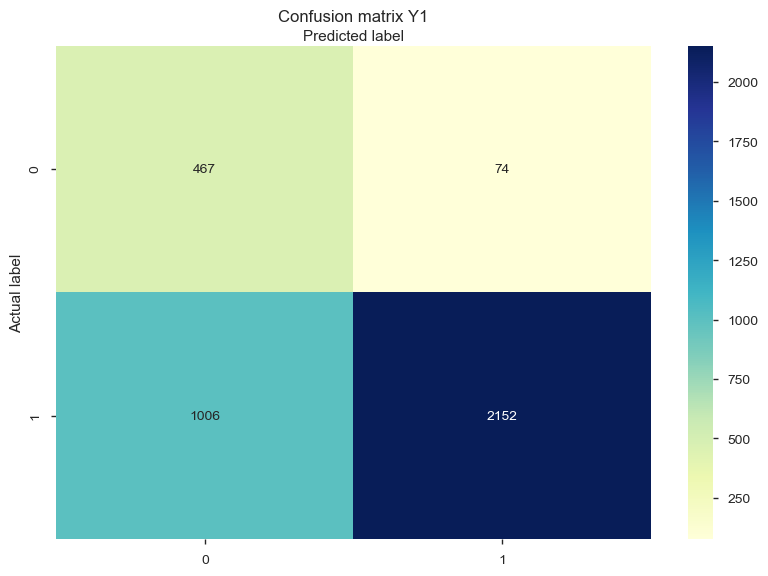

In [64]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Y1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 489.55555555555554, 'Predicted label')

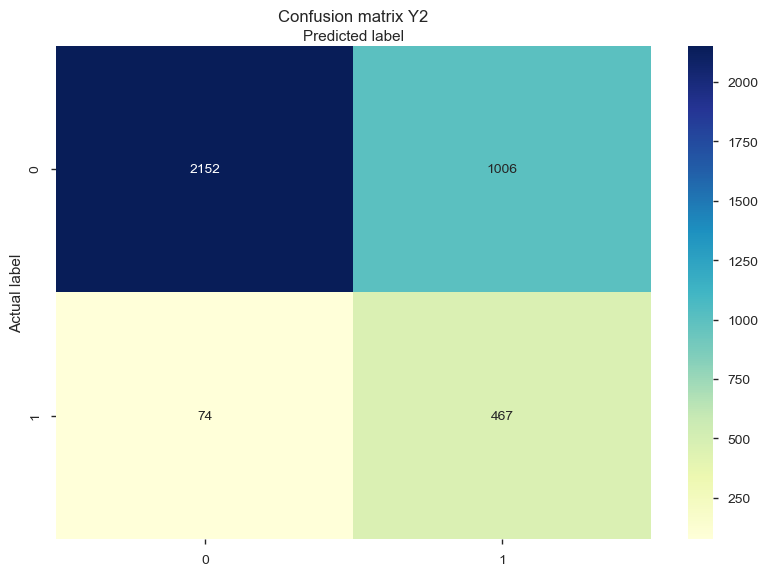

In [65]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Y2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
print(classification_report(y1_test, y_pred1))
print(classification_report(y2_test, y_pred2))


              precision    recall  f1-score   support

         0.0       0.32      0.86      0.46       541
         1.0       0.97      0.68      0.80      3158

    accuracy                           0.71      3699
   macro avg       0.64      0.77      0.63      3699
weighted avg       0.87      0.71      0.75      3699

              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80      3158
         1.0       0.32      0.86      0.46       541

    accuracy                           0.71      3699
   macro avg       0.64      0.77      0.63      3699
weighted avg       0.87      0.71      0.75      3699



    g. Reviewing Correlations to Identify Highly Related/Correlated Features to Avoid in Analysis:


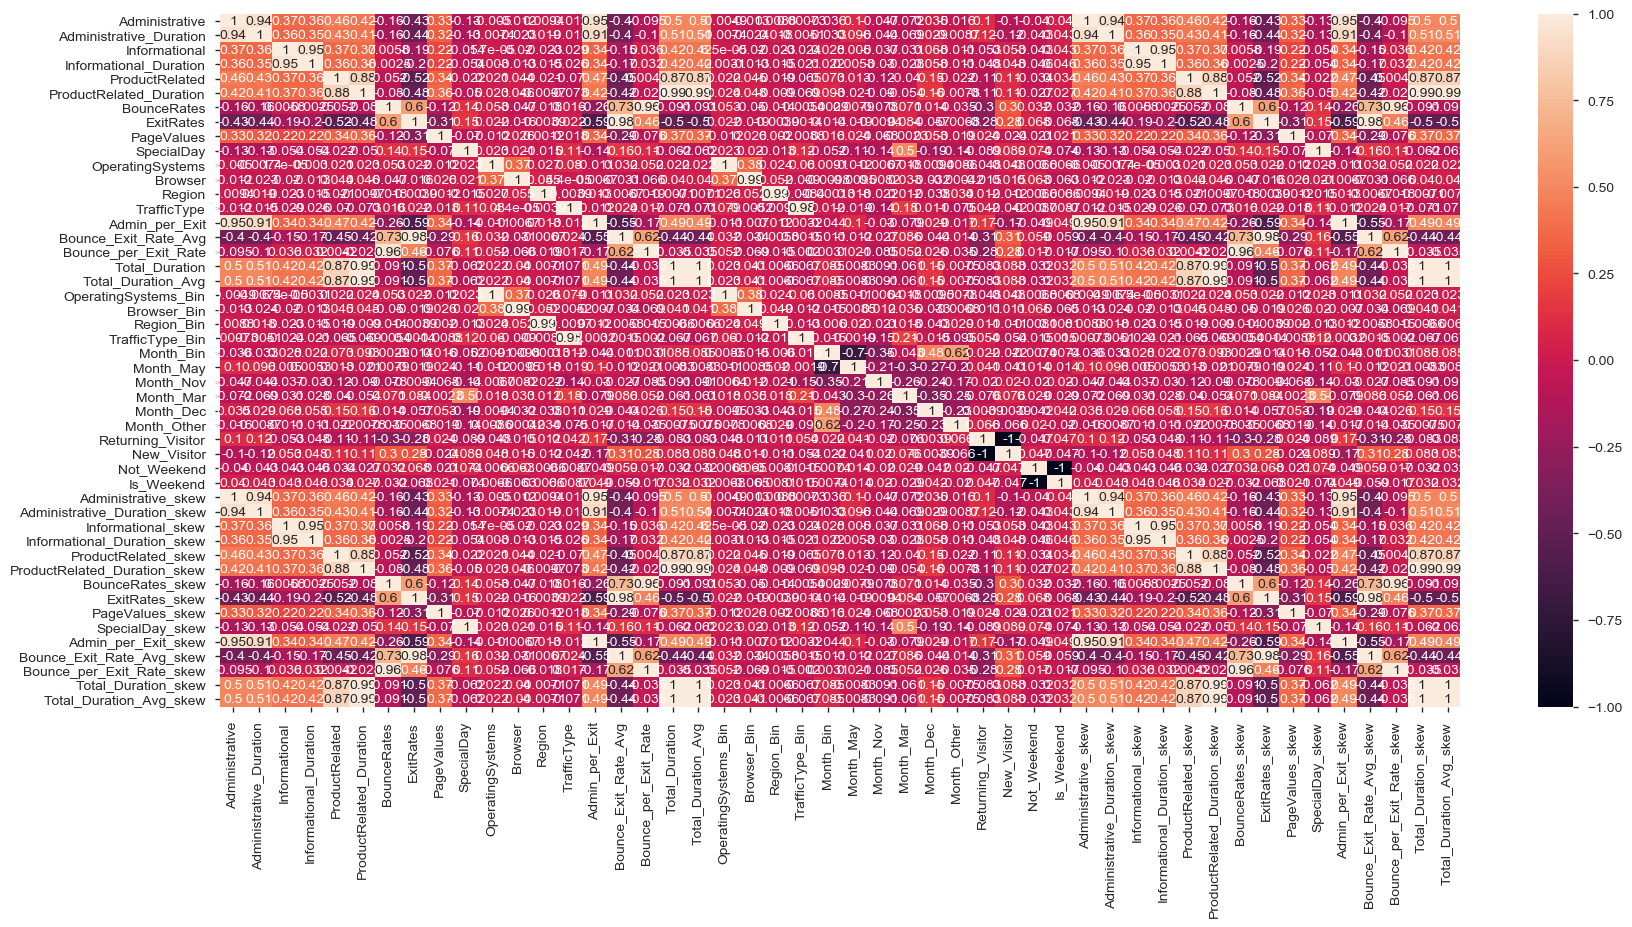

In [67]:
# To be analyzed later by the group

spearman = X.corr(method ='spearman')
plt.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)

    h. Reshape the training dataset

In [68]:
# Initial code to resample the data for later models

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=2019)
print('Original dataset shape %s' % Counter(y2))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
resampled_X_train,resampled_y2_train = sm.fit_resample(X_train,y2_train)
print('Resampled dataset shape %s' % Counter(resampled_y2_train))
#Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({0.0: 10422, 1.0: 1908})
Resampled dataset shape Counter({1.0: 7264, 0.0: 7264})


In [69]:
resampled_X_train.sample(20)

Administrative  Administrative_Duration  Informational  \
12653        0.112281                 0.018477       0.000000   
13876        0.031738                 0.001639       0.000000   
841          0.000000                 0.000000       0.000000   
11092        0.148625                 0.019571       0.000000   
12707        0.000000                 0.000000       0.000000   
4355         0.148148                 0.019027       0.000000   
4143         0.000000                 0.000000       0.125000   
4667         0.074074                 0.008631       0.000000   
2745         0.037037                 0.000000       0.000000   
10411        0.107617                 0.019272       0.000000   
12306        0.168285                 0.031867       0.109627   
9651         0.000000                 0.000000       0.000000   
2244         0.074074                 0.003508       0.083333   
12463        0.345056                 0.058190       0.179855   
10684        0.140210                 0.012851       0.000000   
8453         0.185185                 0.041427       0.166667   
8313         0.000000                 0.000000       0.000000   
1119         0.000000                 0.000000       0.000000   
14429        0.037037                 0.011696       0.011813   
2884         0.000000                 0.000000       0.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12653                0.000000        0.035685                 0.007836   
13876                0.000000        0.013576                 0.007948   
841                  0.000000        0.008511                 0.000203   
11092                0.000000        0.076861                 0.033695   
12707                0.000000        0.022949                 0.030216   
4355                 0.000000        0.053901                 0.022598   
4143                 0.025496        0.021277                 0.030600   
4667                 0.000000        0.139007                 0.041905   
2745                 0.000000        0.079433                 0.041076   
10411                0.000000        0.275363                 0.122862   
12306                0.085109        0.040626                 0.023373   
9651                 0.000000        0.043924                 0.014490   
2244                 0.054523        0.113475                 0.064085   
12463                0.168762        0.384641                 0.186719   
10684                0.000000        0.005471                 0.001165   
8453                 0.099926        0.086525                 0.027200   
8313                 0.000000        0.007092                 0.001708   
1119                 0.000000        0.017021                 0.007370   
14429                0.000000        0.043401                 0.006330   
2884                 0.000000        0.058156                 0.051146   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  \
12653     0.018332   0.054841    0.031621         0.0  ...   
13876     0.000000   0.007540    0.036772         0.0  ...   
841       0.133333   0.166667    0.000000         0.0  ...   
11092     0.000000   0.007655    0.092350         0.0  ...   
12707     0.000000   0.005324    0.242252         0.0  ...   
4355      0.000000   0.005263    0.144054         0.0  ...   
4143      0.000000   0.006250    0.000000         0.0  ...   
4667      0.009184   0.014160    0.044362         0.0  ...   
2745      0.021053   0.025045    0.000000         0.0  ...   
10411     0.002125   0.016804    0.000000         0.0  ...   
12306     0.000000   0.009328    0.000000         0.0  ...   
9651      0.000000   0.025550    0.000000         0.0  ...   
2244      0.004117   0.005280    0.046662         0.0  ...   
12463     0.005714   0.018397    0.054197         0.0  ...   
10684     0.000000   0.027721    0.000000         0.0  ...   
8453      0.007179   0.023796    0.040425         0.0  ...   
8313      0.000000   0.080000   

# Next Steps

# Part IV: Data Analysis/Modeling <a name="part4"></a>

# Part V: Validation  <a name="part5"></a>

# Part VI: Presentation/Visualization  <a name="part6"></a>

# Part VII: Sources  <a name="part7"></a>
1. https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg
2. https://support.google.com/analytics